# Сравнение методов восстановления параметров зашумленной системы

## Загрузка методов

Были рассмотрены 3 метода:
1. Решения системы напрямую, основываясь на отклике системы на $u$ в виде аппроксимации $\delta$-импульса
2. Решения системы комбинаторным методом, основываясь на отклике системы при гармоническом $u$
3. Решения системы эвристическим подходом, основанным на методе Тихонова, подавая на вход периодический ступенчатый сигнал

In [1]:
%run runner.py

## Установки отрисовки

In [2]:
%pylab inline
import seaborn as sns
sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [3]:
errors = [norm_error, uniform_error, two_peaks_error]

In [4]:
def autolabel(ax, rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%0.5f' % height,
                ha='center', va='bottom')

In [5]:
def method_analyzer(T, delta, error):
    # params : cover_percent, match_percent, r2, stdev, time, h_series, abs(h_real - h_pred)
    delta, *params1 = run_m1(T=T, eps=0.5, delta=delta, err_gen=error)
    delta, *params2 = run_m2(T=T, eps=0.5, delta=delta, err_gen=error)
    depth = int(np.floor(np.log2(T / delta))) - 1
    delta, *params3 = run_m3(T=T, eps=0.5, depth=depth, J=5, err_gen=error)
    params = [params1, params2, params3]
    
    # Show coverage and matching
    fig1, ax1 = plt.subplots(figsize=(12,5))
    index = np.arange(2)
    bar_width = 0.25
    opacity = 0.4
    rects1 = ax1.bar(index, params[0][:2], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Метод 1')
    rects2 = ax1.bar(index + bar_width, params[1][:2], bar_width,
                     alpha=opacity,
                     color='r',
                     label='Метод 2')
    rects3 = ax1.bar(index + 2 * bar_width, params[2][:2], bar_width,
                     alpha=opacity,
                     color='g',
                     label='Метод 3')
    ax1.set_xlabel('Статистики')
    ax1.set_ylabel('%')
    ax1.set_title('Статистики покрытия и попадания в доверительные интервалы %s' % (error.__name__))
    ax1.set_xticks(index + 1.5 * bar_width)
    ax1.set_xticklabels(('Покрытие', 'Попадание'))
    ax1.legend(loc=0)
    ax1.grid(False)
    fig1.tight_layout()
    
    # Show r2, stdev, time
    fig2, (ax21, ax22, ax23) = plt.subplots(1, 3, figsize=(12,5))
    index = np.arange(3)
    xlabels = ('Метод 1', 'Метод 2', 'Метод 3')
    bar_width = 0.5
    ax21.set_title('$R^2$')
    ax21.scatter(index, [p[2] for p in params], marker='^', s=40, color='r')
    ax21.set_xticks(index)
    ax21.set_xticklabels(xlabels)
    ax22.set_title('Std')
    ax22.grid(False)
    rects2 = ax22.bar(index, [p[3] for p in params], bar_width,
                     alpha=opacity,
                     color='b')
    autolabel(ax22, rects2)
    ax22.set_xticks(index + 0.5 * bar_width)
    ax22.set_xticklabels(xlabels)
    ax23.set_title('Время работы')
    ax23.grid(False)
    rects3 = ax23.bar(index, [p[4] for p in params], bar_width,
                     alpha=opacity,
                     color='b')
    autolabel(ax23, rects3)
    ax23.set_ylabel('s')
    ax23.set_xticks(index + 0.5 * bar_width)
    ax23.set_xticklabels(xlabels)
    fig2.tight_layout()
    # Show residual
    fig3, ax3 = plt.subplots(figsize=(12,5))
    h_pair1, h_pair2, h_pair3 = (p[-1] for p in params)
    ax3.set_title('Невязка: abs(h_real - h_central)')
    ax3.plot(h_pair1[0], h_pair1[1], 'r', label='$|\Delta h|_1$')
    ax3.plot(h_pair2[0], h_pair2[1], 'g', label='$|\Delta h|_2$')
    ax3.plot(h_pair3[0], h_pair3[1], 'b', label='$|\Delta h|_3$')
    ax3.legend(loc=0)
    fig3.tight_layout()

## Сравнение

### Параметры для сравнения

Для сравнения эффективности методов были использованы следующие параметры:
1. Процент покрытия промежутка $[0, T]$ найденной аппроксимацией $h$.
2. Процент попадания в полученные доверительные интервалы.
3. Характеристика $R^2$ консистентности регресии для оценки насколько хорошо середина интервалов аппроксимирует реальное значение $h$.
4. Мера точности приближения STD, которая определяется как среднее квадратическое по размерам доверительных интервалов.
5. Среднее время вычислений.

### Сравнение при слабом дроблении

Для начала сравним методы в случае слабого дробления, к примеру возьмем $\delta = 2.5$ при $T = 20$.

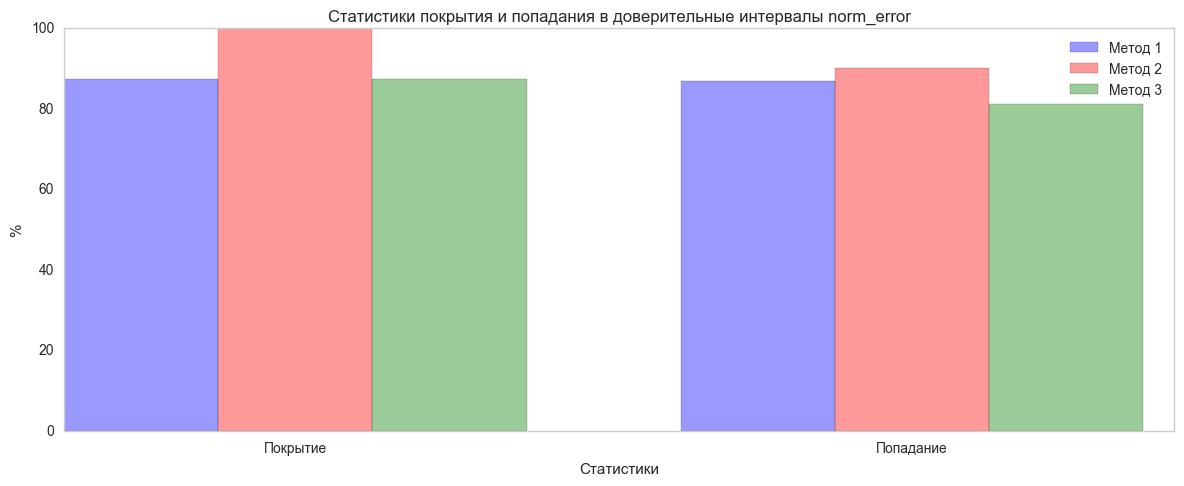

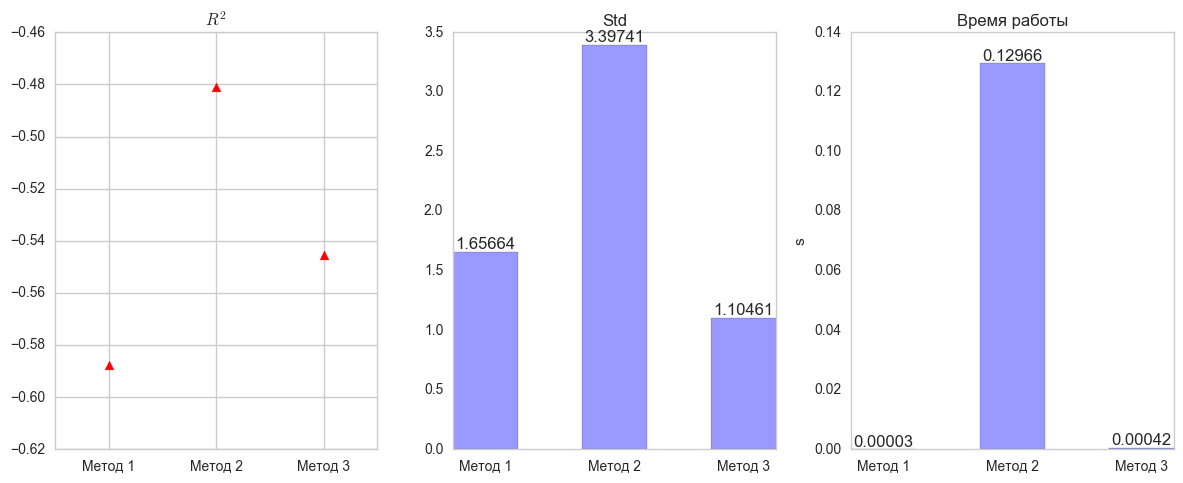

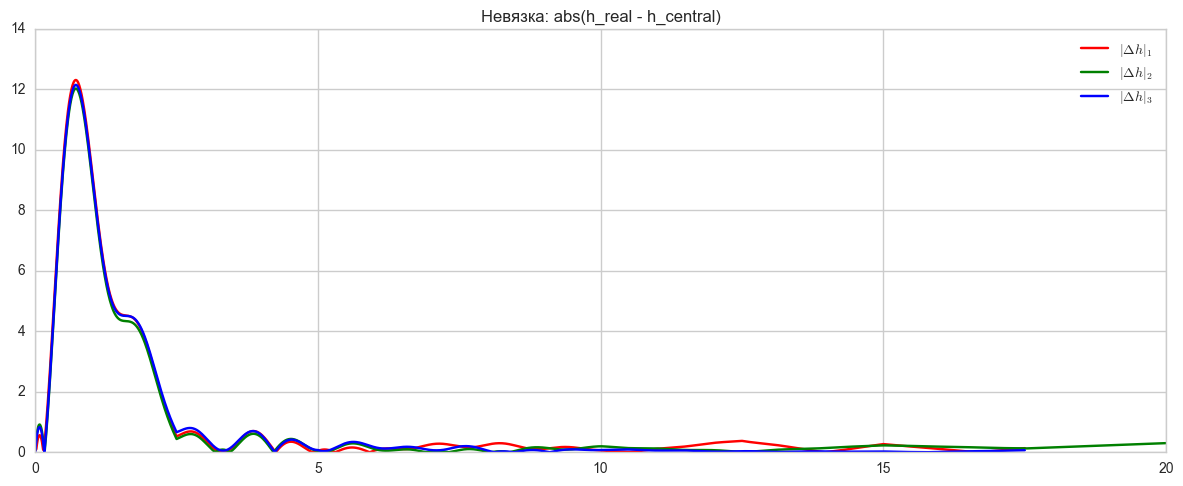

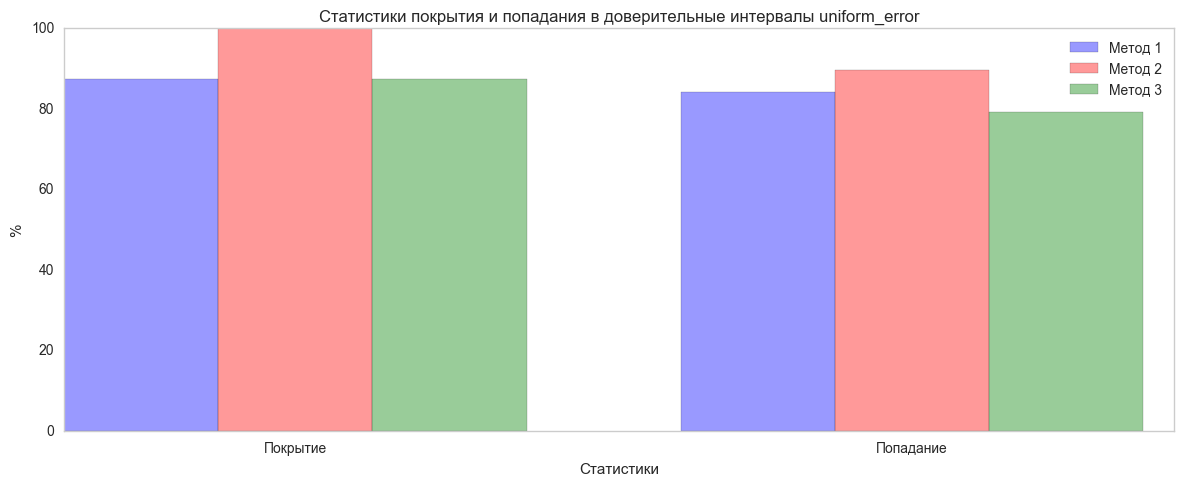

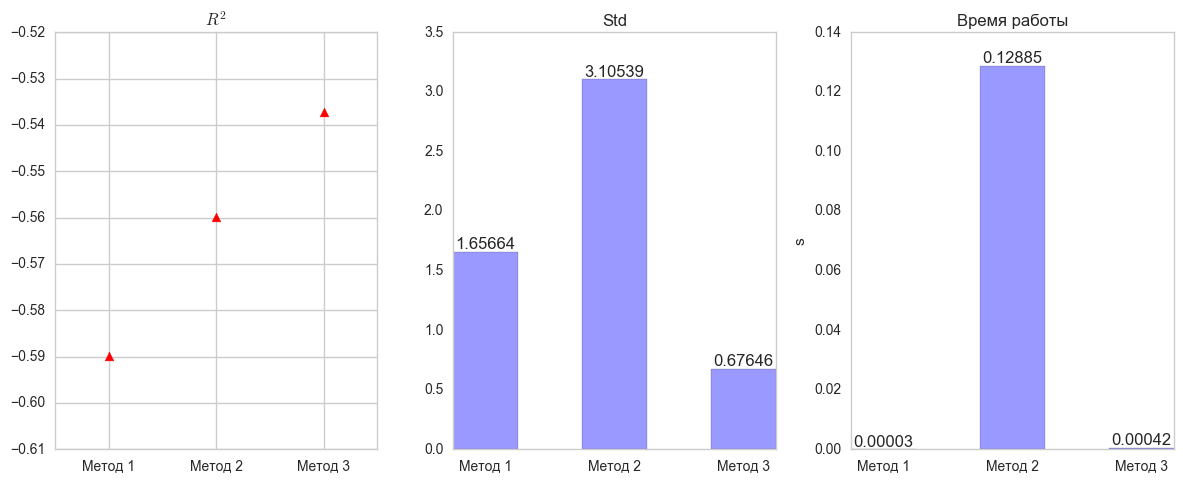

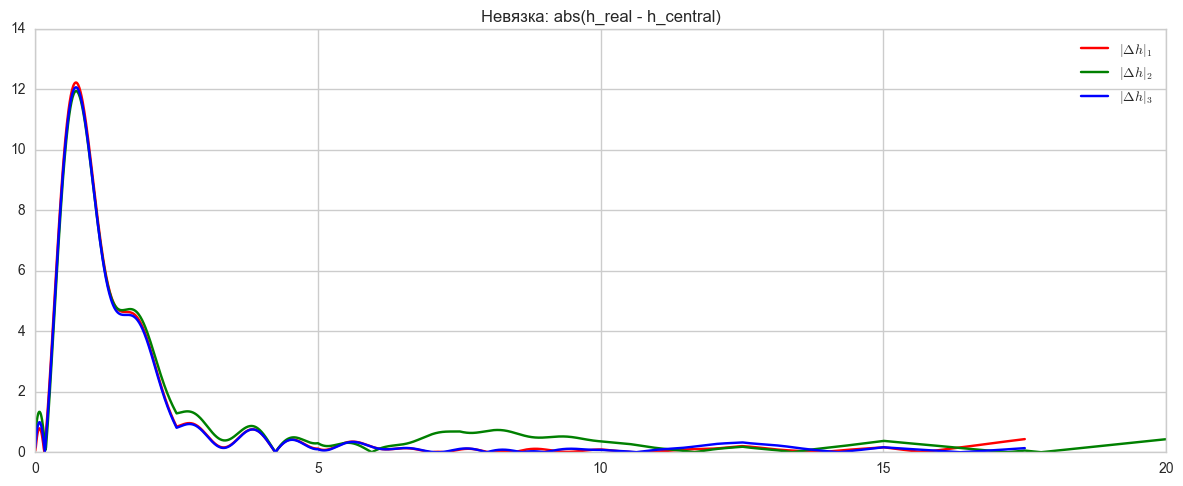

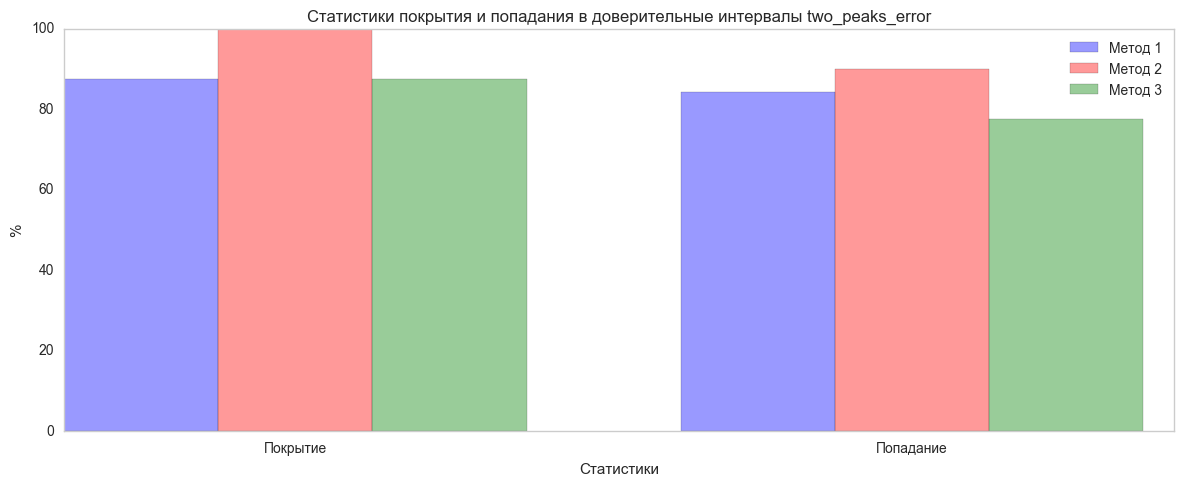

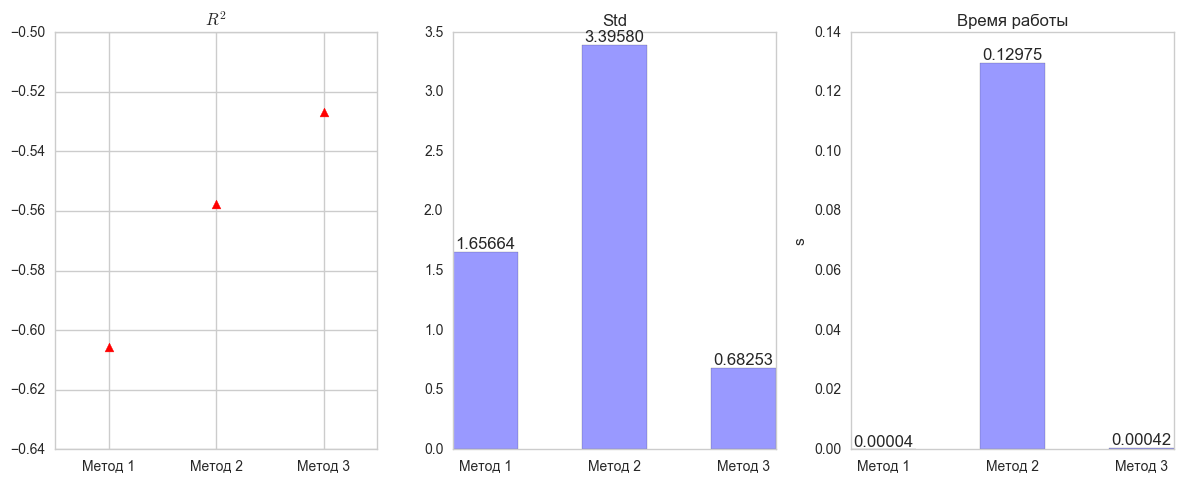

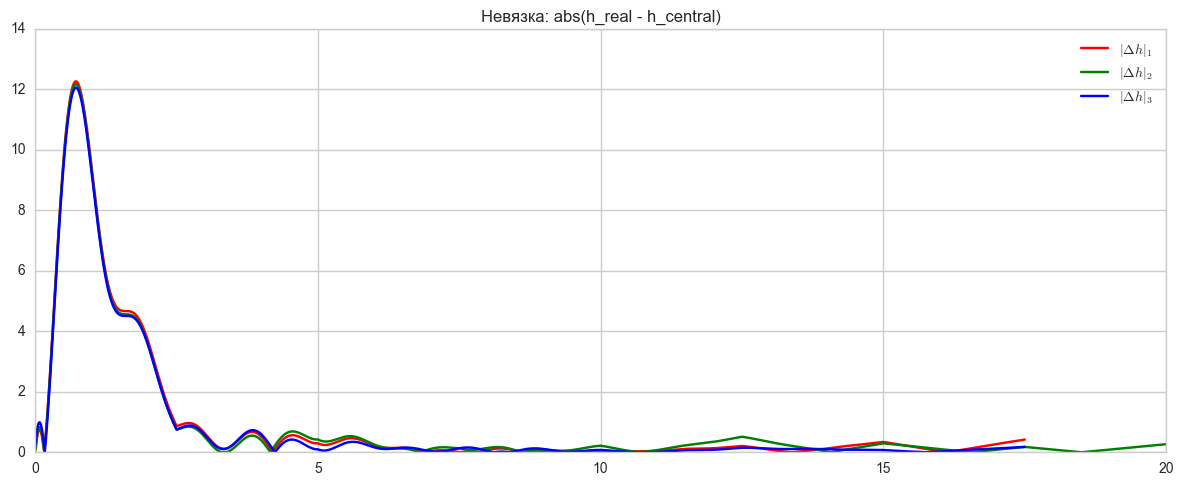

In [6]:
for error in errors:
    method_analyzer(20, 2.5, error)